# EDA - Predict Churn Devolus Customers

In [1]:
#basic imports
import pandas as pd
import numpy as np
import matplotlib as mpl

%matplotlib inline
import warnings
import datetime as dt

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


warnings.filterwarnings("ignore")

In [2]:
mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
df = pd.read_csv("empresas.csv", sep=';', parse_dates=['Data cadastro', 'Data cancelamento'], date_parser = pd.to_datetime , dayfirst=True)
df.head()

,Nome,Email,Telefone,CPF/CNPJ,Data cadastro,Cidade,UF,Qtd vistoria,Qtd foto,Armazenamento,Situação,Data limite teste,Vencimento,Valor,Desconto,Valor vistoria adicional,Data compra,Data cancelamento
0,1 ponto imobiliario,NaN,(31) 999548491,17.149.156/0001-31,2021-01-16,Belo Horizonte,MG,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2F BRASIL CORRETORA DE SEGUROS E IMOVEIS LTDA.,NaN,(19) 999094009,20.453.418/0001-61,2019-10-30,SANTA BARBARA D'OESTE,SP,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,375 vistorias,NaN,(16) 997178534,04.337.168/0001-48,2021-01-16,Ribeirão Preto,SP,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4G RENTALS ADMINISTRACAO DE BENS,NaN,(12) 981120031,19.107.363/0001-59,2020-11-26,São José dos Campos,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,7x7 Consultoria de Imoveis Ltda,NaN,(11) 980667001,39.331.629/0001-50,2020-10-21,Diadema,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [3]:
colunas = {"Nome":"nome","Email":"email","Telefone":"telefone","CPF/CNPJ":"CPF/CNPJ","Data cadastro":"dtcadastro","Cidade":"cidade","UF":"uf","Qtd vistoria":"qtdvistoria","Qtd foto":"qtdfoto","Armazenamento":"armazenamento",
           "Data limite teste":"limiteteste","Vencimento":"vencimento","Valor":"valor",
           "Desconto":"desconto","Valor vistoria adicional":"vistoriaadd","Data compra":"dtcompra","Data cancelamento":"dtcancelamento","Data cancelamento":"dtcancelamento","Situação":"situacao"}
df.rename(columns=colunas, inplace=True)
df.head()

,nome,email,telefone,CPF/CNPJ,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,limiteteste,vencimento,valor,desconto,vistoriaadd,dtcompra,dtcancelamento
0,1 ponto imobiliario,NaN,(31) 999548491,17.149.156/0001-31,2021-01-16,Belo Horizonte,MG,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2F BRASIL CORRETORA DE SEGUROS E IMOVEIS LTDA.,NaN,(19) 999094009,20.453.418/0001-61,2019-10-30,SANTA BARBARA D'OESTE,SP,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,375 vistorias,NaN,(16) 997178534,04.337.168/0001-48,2021-01-16,Ribeirão Preto,SP,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4G RENTALS ADMINISTRACAO DE BENS,NaN,(12) 981120031,19.107.363/0001-59,2020-11-26,São José dos Campos,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,7x7 Consultoria de Imoveis Ltda,NaN,(11) 980667001,39.331.629/0001-50,2020-10-21,Diadema,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nome            3075 non-null   object        
 1   email           1155 non-null   object        
 2   telefone        2770 non-null   object        
 3   CPF/CNPJ        3075 non-null   object        
 4   dtcadastro      3076 non-null   datetime64[ns]
 5   cidade          3076 non-null   object        
 6   uf              3076 non-null   object        
 7   qtdvistoria     3076 non-null   int64         
 8   qtdfoto         3076 non-null   int64         
 9   armazenamento   3076 non-null   int64         
 10  situacao        3076 non-null   object        
 11  limiteteste     33 non-null     object        
 12  vencimento      597 non-null    float64       
 13  valor           597 non-null    float64       
 14  desconto        15 non-null     float64       
 15  vist

In [5]:
df.tail()

,nome,email,telefone,CPF/CNPJ,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,limiteteste,vencimento,valor,desconto,vistoriaadd,dtcompra,dtcancelamento
3071,zalix guerra nelson,NaN,(84) 999530721,942.116.634-53,2020-05-14,Natal,RN,4,200,1,Gratuito,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3072,ZANGARI NETIMOVEIS LTDA,silvana@zangari.com.br,(11) 30744242,09.290.783/0001-60,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,NaN,5.0,180.29,NaN,3.5,NaN,NaT
3073,Zilda Cavalcanti,NaN,(19) 995070352,101.107.428-18,2020-06-23,Campinas,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3074,Zuccaro Imóveis,kmendes.zuccaro@gmail.com,(11) 2408-7888,184.913.968-70,2021-05-02,Guarulhos,SP,120,999999,20,Ativa,NaN,21.0,339.00,NaN,3.5,17/02/2021,NaT
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,juliana@zylber.com.br,(11) 33343311,43.786.862/0001-02,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,NaN,5.0,180.39,NaN,3.5,NaN,NaT


In [6]:
df.drop('limiteteste', axis=1, inplace=True)
df.drop('dtcompra', axis=1, inplace=True)
df.drop('email', axis=1, inplace=True)
df.drop('telefone', axis=1, inplace=True)
df.drop('CPF/CNPJ', axis=1, inplace=True)
df.drop('vencimento', axis=1, inplace=True)

df.head()

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
0,1 ponto imobiliario,2021-01-16,Belo Horizonte,MG,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaT
1,2F BRASIL CORRETORA DE SEGUROS E IMOVEIS LTDA.,2019-10-30,SANTA BARBARA D'OESTE,SP,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaT
2,375 vistorias,2021-01-16,Ribeirão Preto,SP,20,999,1,Gratuito inativo,NaN,NaN,NaN,NaT
3,4G RENTALS ADMINISTRACAO DE BENS,2020-11-26,São José dos Campos,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaT
4,7x7 Consultoria de Imoveis Ltda,2020-10-21,Diadema,SP,4,200,1,Gratuito,NaN,NaN,NaN,NaT


In [7]:
df["situacao"].value_counts()

Gratuito                     1646
Gratuito inativo              623
Ativa                         436
Cancelada                     321
Teste                          33
Inativa por não pagamento      17
Name: situacao, dtype: int64

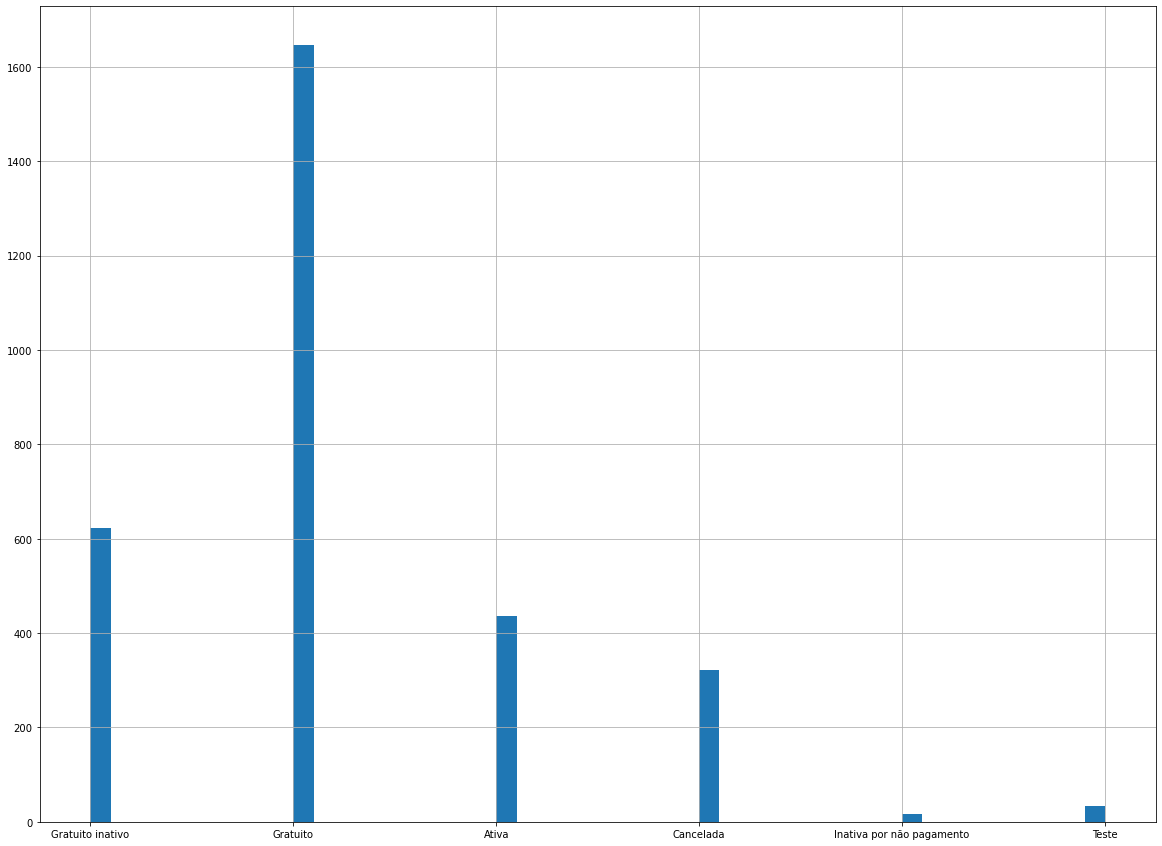

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df["situacao"].hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df.describe()

,qtdvistoria,qtdfoto,armazenamento,valor,desconto,vistoriaadd
count,3076.000000,3076.000000,3076.000000,597.000000,15.000000,597.000000
mean,27.227243,215554.616385,32.108583,170.443819,24.992000,3.412060
std,119.576994,410859.646256,168.718666,117.995263,24.219912,0.548233
min,0.000000,1.000000,1.000000,0.000000,2.840000,0.000000
25%,4.000000,200.000000,1.000000,117.480000,2.840000,3.500000
50%,4.000000,200.000000,1.000000,147.740000,5.000000,3.500000
75%,20.000000,999.000000,1.000000,184.260000,50.000000,3.500000
max,999.000000,999999.000000,999.000000,1588.000000,50.000000,3.500000


In [10]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [11]:
missing_zero_values_table(df)

Your selected dataframe has 12 columns and 3076 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
desconto,0,3061,99.5,3061,99.5,float64
dtcancelamento,0,3039,98.8,3039,98.8,datetime64[ns]
valor,15,2479,80.6,2494,81.1,float64
vistoriaadd,15,2479,80.6,2494,81.1,float64
nome,0,1,0.0,1,0.0,object


In [12]:
df.shape

(3076, 12)

In [13]:
df['desconto'] = df['desconto'].fillna(0)
df['valor'] = df['valor'].fillna(0)
df['vistoriaadd'] = df['vistoriaadd'].fillna(0)
#df['dtcancelamento'] = df['dtcancelamento'].fillna('')
#df['dtcadastro'] = df['dtcadastro'].fillna('')
df['nome'] = df['nome'].fillna('')


df.tail()

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3071,zalix guerra nelson,2020-05-14,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3072,ZANGARI NETIMOVEIS LTDA,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaT
3073,Zilda Cavalcanti,2020-06-23,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3074,Zuccaro Imóveis,2021-05-02,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaT
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaT


In [14]:
df.shape

(3076, 12)

In [15]:
missing_zero_values_table(df)

Your selected dataframe has 12 columns and 3076 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
dtcancelamento,0,3039,98.8,3039,98.8,datetime64[ns]


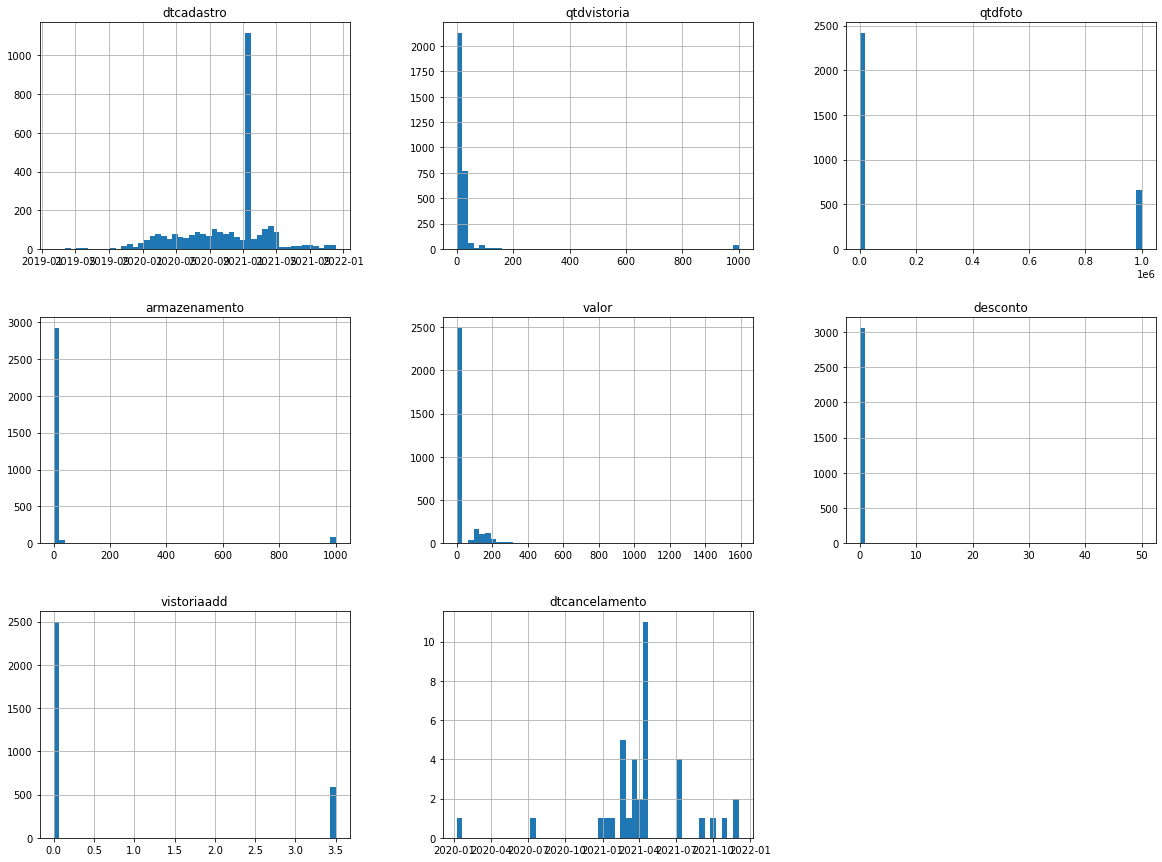

In [16]:
df3 = df.copy()
%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
df_grouped_uf = df3.groupby(['uf']).max()['valor']
df_grouped_qtdv = df3.groupby(['uf']).mean()['qtdvistoria']
df_grouped_foto = df3.groupby(['qtdfoto']).mean()['valor']
df_grouped_data = df3.groupby(['dtcadastro']).sum()

df_grouped_uf.head()


uf
AC    324.62
AL      0.00
AM    120.00
AP      0.00
BA    242.72
Name: valor, dtype: float64

<AxesSubplot:xlabel='uf'>

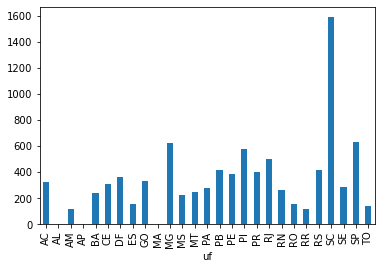

In [18]:
df_grouped_uf.plot.bar(x='uf', y='valor')

In [19]:
result = df3.groupby('uf').agg({'valor': ['mean', 'max']})
  
print("Mean, min, and max values of Top valor grouped by UF")
print(result)

Mean, min, and max values of Top valor grouped by UF
        valor         
         mean      max
uf                    
AC   8.944865   324.62
AL   0.000000     0.00
AM  12.105263   120.00
AP   0.000000     0.00
BA  11.385974   242.72
CE  41.335435   313.20
DF  35.975926   363.61
ES  16.632340   154.11
GO  30.575556   332.16
MA   0.000000     0.00
MG  52.117417   626.05
MS  47.396552   227.07
MT  37.044359   249.00
PA  54.750000   280.00
PB  20.740417   417.87
PE  28.178571   385.55
PI  77.516250   575.00
PR  26.351977   401.00
RJ  18.070711   500.00
RN  44.324444   266.00
RO  40.668182   155.00
RR  40.000000   120.00
RS  40.936640   417.87
SC  50.420234  1588.00
SE  49.582308   286.57
SP  34.243741   634.00
TO  15.625000   140.00


<AxesSubplot:xlabel='uf'>

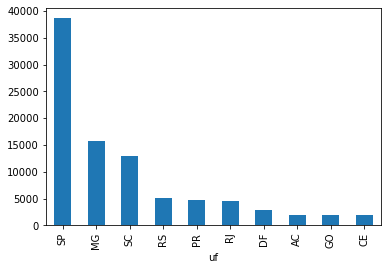

In [20]:
# TOP 10 principais mercados consumidores (por valor pago) DEVOLUS
top_10 = df3.groupby(['uf'])['valor'].sum().sort_values(ascending=False).head(10)
top_10.plot.bar()

<AxesSubplot:xlabel='nome'>

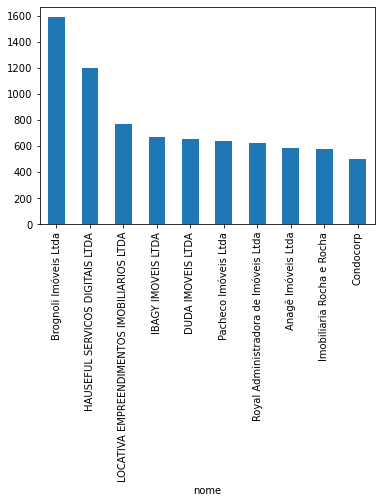

In [21]:
# TOP 10 principais clientes por plano.
top_10 = df3.groupby(['nome'])['valor'].sum().sort_values(ascending=False).head(10)
top_10.plot.bar()

<AxesSubplot:xlabel='qtdfoto'>

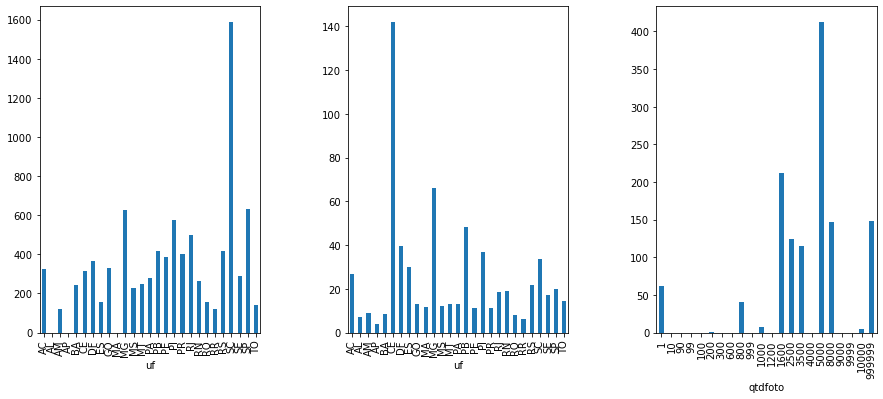

In [22]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df_grouped_uf.plot(kind='bar', x='uf', y='valor', ax=axes[0])
df_grouped_qtdv.plot(kind='bar', x='uf', y='qtdvistoria', ax=axes[1])
df_grouped_foto.plot(kind='bar', x='uf', y='qtdfoto', ax=axes[2])


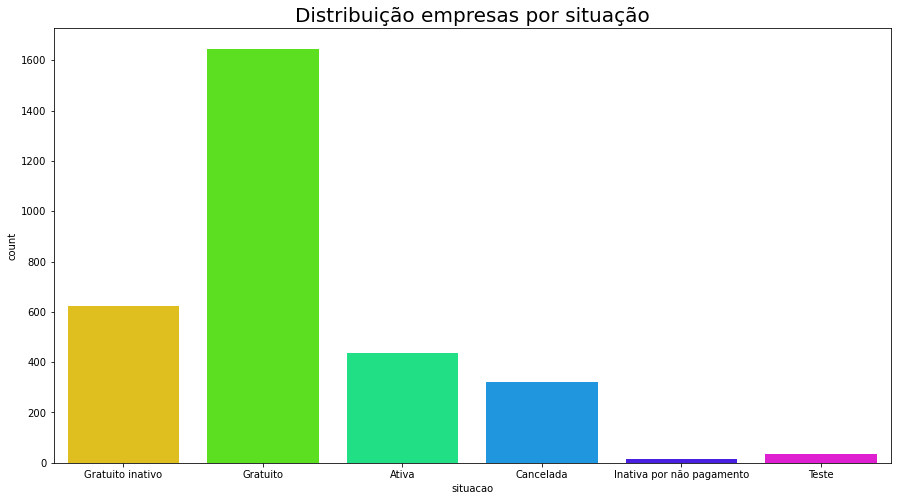

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df3['situacao'], palette = 'hsv')
plt.title('Distribuição empresas por situação', fontsize = 20)
plt.show()

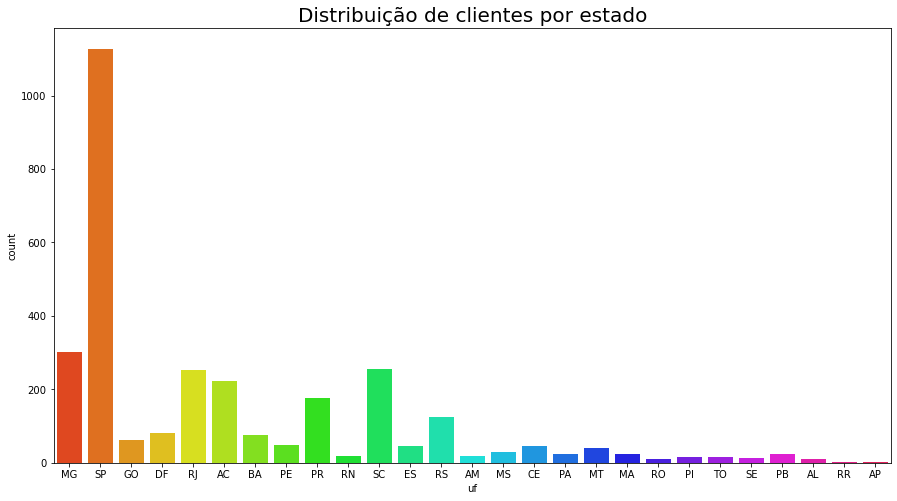

In [24]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df3['uf'], palette = 'hsv')
plt.title('Distribuição de clientes por estado', fontsize = 20)
plt.show()

In [25]:
# df_grouped_uf2 = df3.groupby(['uf']).count()
# df_grouped_uf2.head(100)
df3.groupby('nome').sum()

,qtdvistoria,qtdfoto,armazenamento,valor,desconto,vistoriaadd
nome,,,,,,
,20,999,1,0.0,0.0,0.0
ADN IMOVEIS E CONSULTORIA LTDA,20,999,1,0.0,0.0,0.0
Charles Ramos Gandra,4,200,1,0.0,0.0,0.0
"Maximoveis - Assessoria, Administração e Venda de Imóveis LTDA",4,200,1,0.0,0.0,0.0
1 ponto imobiliario,20,999,1,0.0,0.0,0.0
...,...,...,...,...,...,...
Épora Negócios Imobiliários,20,999999,3,155.0,0.0,3.5
Ética Imobiliária Ltda,20,999,1,0.0,0.0,0.0
Éverton Luiz Gonçalves,4,200,1,0.0,0.0,0.0


In [26]:
#Agrupando imobiliárias, valor pago e situação
grouped_imob_by_max_vistoria = df3.groupby(['nome', 'valor', 'situacao']).qtdvistoria.agg([max])
grouped_imob_by_max_vistoria.head()

,,,max
nome,valor,situacao,
,0.0,Gratuito inativo,20
ADN IMOVEIS E CONSULTORIA LTDA,0.0,Gratuito inativo,20
Charles Ramos Gandra,0.0,Gratuito,4
"Maximoveis - Assessoria, Administração e Venda de Imóveis LTDA",0.0,Gratuito,4
1 ponto imobiliario,0.0,Gratuito inativo,20


In [27]:
# Listando imobiliária que tem plano gratuito ou gratuito inativo mas que possui valor e adicional
rslt_df = df3[((df3['situacao'] == 'Gratuito inativo') | (df3['situacao'] == 'Gratuito')) & df3['valor'] > 0.0]

rslt_df.head(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
30,ADEMIR ROBSON RODRIGUES NUNES 16718973823,2020-05-02,SAO CARLOS,SP,4,200,1,Gratuito,110.0,0.0,3.5,NaT
1788,Luciene Stela Lui,2020-02-27,São José do Rio Preto,SP,10,999999,1,Gratuito inativo,110.0,0.0,3.5,NaT
2287,Pedro Roberto Ferreira Amorim,2021-01-16,Campo grande,MS,4,200,1,Gratuito,110.0,0.0,3.5,NaT
2871,TPA Empreendimentos,2020-10-13,São Paulo,SP,4,200,1,Gratuito inativo,155.0,0.0,3.5,NaT


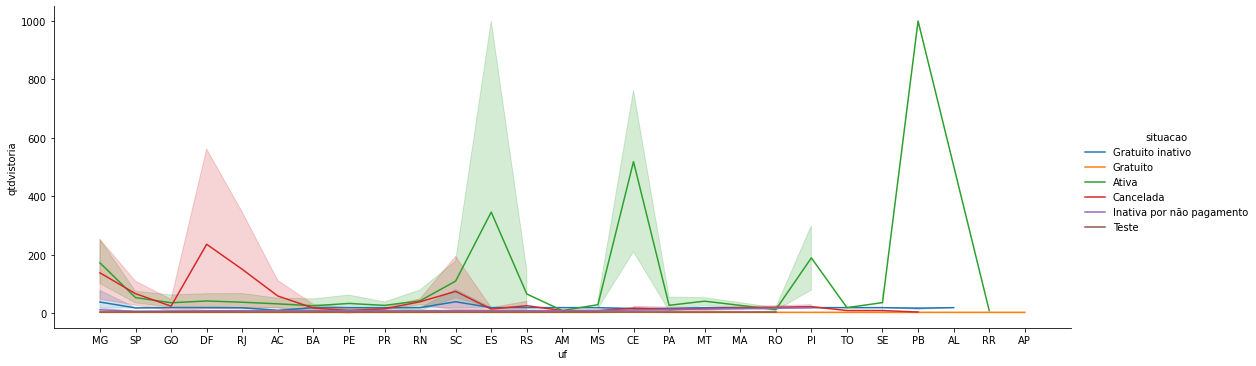

In [28]:
sns.relplot(data=df3, x="uf", y="qtdvistoria", hue="situacao",kind="line", height=5, aspect=3.0)


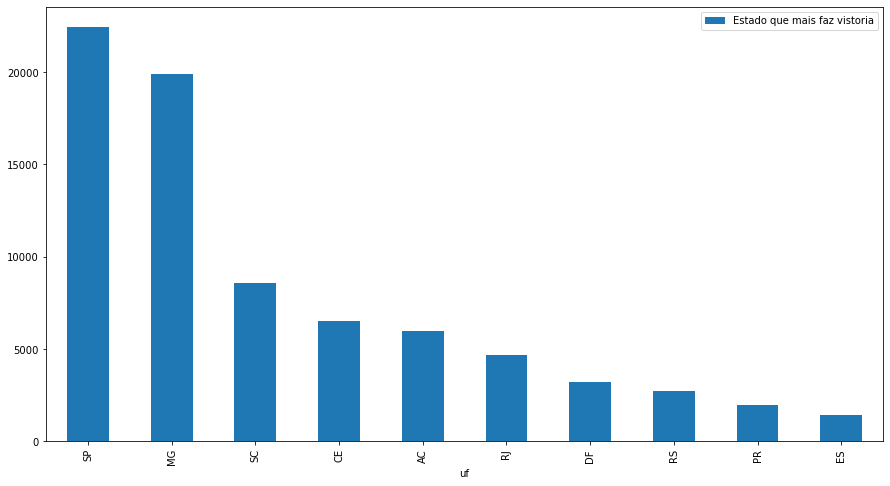

In [29]:
# Ranking dos Estados que mais fazem vistoria 
group_imob_qtdvist = df3.groupby(['uf'])['qtdvistoria'].sum().sort_values(ascending=False).head(10)
group_imob_qtdvist.plot(kind='bar')
plt.legend(["Estado que mais faz vistoria"]);


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nome            3076 non-null   object        
 1   dtcadastro      3076 non-null   datetime64[ns]
 2   cidade          3076 non-null   object        
 3   uf              3076 non-null   object        
 4   qtdvistoria     3076 non-null   int64         
 5   qtdfoto         3076 non-null   int64         
 6   armazenamento   3076 non-null   int64         
 7   situacao        3076 non-null   object        
 8   valor           3076 non-null   float64       
 9   desconto        3076 non-null   float64       
 10  vistoriaadd     3076 non-null   float64       
 11  dtcancelamento  37 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 288.5+ KB


In [31]:
df3.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3066,Ygor de Araujo Sousa,2021-04-29,São Bernardo do Campo,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3067,Yohana,2020-07-09,Rio de Janeiro,RJ,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3068,yohanna pontes mendes,2021-08-04,fortaleza,CE,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,2020-11-27,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,2021-10-03
3070,Zabaleta Construtora e Incorporadora Ltda,2021-01-16,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT
3071,zalix guerra nelson,2020-05-14,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3072,ZANGARI NETIMOVEIS LTDA,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaT
3073,Zilda Cavalcanti,2020-06-23,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3074,Zuccaro Imóveis,2021-05-02,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaT
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaT


In [32]:
#mudando o campo datetime para strint para pode trabalhar com ele melhor
df4 = df3.copy()
df4['dtcancelamento'] = df4['dtcancelamento'].dt.strftime('%d/%m/%Y')
df4['dtcadastro'] = df4['dtcadastro'].dt.strftime('%d/%m/%Y')

df4.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3066,Ygor de Araujo Sousa,29/04/2021,São Bernardo do Campo,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3067,Yohana,09/07/2020,Rio de Janeiro,RJ,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3068,yohanna pontes mendes,04/08/2021,fortaleza,CE,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,27/11/2020,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,03/10/2021
3070,Zabaleta Construtora e Incorporadora Ltda,16/01/2021,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaN
3071,zalix guerra nelson,14/05/2020,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3072,ZANGARI NETIMOVEIS LTDA,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaN
3073,Zilda Cavalcanti,23/06/2020,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3074,Zuccaro Imóveis,02/05/2021,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaN
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaN


In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nome            3076 non-null   object 
 1   dtcadastro      3076 non-null   object 
 2   cidade          3076 non-null   object 
 3   uf              3076 non-null   object 
 4   qtdvistoria     3076 non-null   int64  
 5   qtdfoto         3076 non-null   int64  
 6   armazenamento   3076 non-null   int64  
 7   situacao        3076 non-null   object 
 8   valor           3076 non-null   float64
 9   desconto        3076 non-null   float64
 10  vistoriaadd     3076 non-null   float64
 11  dtcancelamento  37 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 288.5+ KB


In [34]:

df4['dtcancelamento'] = np.where(((df4.situacao == 'Cancelada') & (df4.dtcancelamento.isna())), '31/01/2021' , df4['dtcancelamento'])
df4.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3066,Ygor de Araujo Sousa,29/04/2021,São Bernardo do Campo,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3067,Yohana,09/07/2020,Rio de Janeiro,RJ,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3068,yohanna pontes mendes,04/08/2021,fortaleza,CE,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,27/11/2020,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,03/10/2021
3070,Zabaleta Construtora e Incorporadora Ltda,16/01/2021,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaN
3071,zalix guerra nelson,14/05/2020,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3072,ZANGARI NETIMOVEIS LTDA,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaN
3073,Zilda Cavalcanti,23/06/2020,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3074,Zuccaro Imóveis,02/05/2021,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaN
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaN


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nome            3076 non-null   object 
 1   dtcadastro      3076 non-null   object 
 2   cidade          3076 non-null   object 
 3   uf              3076 non-null   object 
 4   qtdvistoria     3076 non-null   int64  
 5   qtdfoto         3076 non-null   int64  
 6   armazenamento   3076 non-null   int64  
 7   situacao        3076 non-null   object 
 8   valor           3076 non-null   float64
 9   desconto        3076 non-null   float64
 10  vistoriaadd     3076 non-null   float64
 11  dtcancelamento  324 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 288.5+ KB


In [37]:
df4['dtcancelamento'] = np.where(df4['dtcancelamento'] == 'NaN', ' ' , df4['dtcancelamento'])
df4.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3066,Ygor de Araujo Sousa,29/04/2021,São Bernardo do Campo,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3067,Yohana,09/07/2020,Rio de Janeiro,RJ,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3068,yohanna pontes mendes,04/08/2021,fortaleza,CE,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,27/11/2020,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,03/10/2021
3070,Zabaleta Construtora e Incorporadora Ltda,16/01/2021,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaN
3071,zalix guerra nelson,14/05/2020,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3072,ZANGARI NETIMOVEIS LTDA,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaN
3073,Zilda Cavalcanti,23/06/2020,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3074,Zuccaro Imóveis,02/05/2021,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaN
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaN


In [38]:
df4.loc[df4['situacao'] == 'Cancelada']

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
19,AC ANTUNES,16/01/2021,teste,AC,10,90,1,Cancelada,0.0,0.0,0.0,31/01/2021
20,Acapulco Empreendimentos Imobiliários American...,16/01/2021,Americana,SP,30,999999,30,Cancelada,194.0,0.0,3.5,31/01/2021
24,AÇORES CORRETORA DE SEGUROS E ASS. EMPRESARIAL...,16/01/2021,teste,SP,20,999999,3,Cancelada,0.0,0.0,0.0,31/01/2021
25,ACRC IMOVEIS,16/01/2021,Blumenau,SC,30,999999,30,Cancelada,199.7,0.0,3.5,04/04/2021
26,ADBENS NEGOCIOS IMOBILIARIOS LTDA,16/01/2021,São Paulo,SP,50,999999,10,Cancelada,0.0,0.0,0.0,31/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
3046,WILC CONSULTORIA IMOBILIARIA EIRELI,01/09/2020,RIO DE JANEIRO,RJ,10,999999,1,Cancelada,110.0,0.0,3.5,31/01/2021
3048,William,12/04/2020,São Paulo,SP,5,999999,1,Cancelada,79.9,0.0,3.5,03/03/2021
3050,William Ferreira,07/09/2020,São Paulo,SP,5,999999,1,Cancelada,77.0,0.0,3.5,31/01/2021
3060,W Negócios Imobiliários Eirele,16/01/2021,São Paulo,SP,10,999999,11,Cancelada,134.0,0.0,3.5,31/01/2021


In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nome            3076 non-null   object 
 1   dtcadastro      3076 non-null   object 
 2   cidade          3076 non-null   object 
 3   uf              3076 non-null   object 
 4   qtdvistoria     3076 non-null   int64  
 5   qtdfoto         3076 non-null   int64  
 6   armazenamento   3076 non-null   int64  
 7   situacao        3076 non-null   object 
 8   valor           3076 non-null   float64
 9   desconto        3076 non-null   float64
 10  vistoriaadd     3076 non-null   float64
 11  dtcancelamento  324 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 288.5+ KB


In [41]:
df5 = df4.copy()
df5['dtcadastro']=pd.to_datetime(df5['dtcadastro'].str.strip(), format='%d-%m-%Y', errors='ignore', dayfirst=True)
df5['dtcancelamento']=pd.to_datetime(df5['dtcancelamento'].str.strip(), format='%d-%m-%Y', errors='ignore', dayfirst=True)

df5.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3066,Ygor de Araujo Sousa,29/04/2021,São Bernardo do Campo,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3067,Yohana,09/07/2020,Rio de Janeiro,RJ,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3068,yohanna pontes mendes,04/08/2021,fortaleza,CE,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,27/11/2020,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,03/10/2021
3070,Zabaleta Construtora e Incorporadora Ltda,16/01/2021,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaN
3071,zalix guerra nelson,14/05/2020,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3072,ZANGARI NETIMOVEIS LTDA,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaN
3073,Zilda Cavalcanti,23/06/2020,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaN
3074,Zuccaro Imóveis,02/05/2021,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaN
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,16/01/2021,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaN


In [42]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nome            3076 non-null   object 
 1   dtcadastro      3076 non-null   object 
 2   cidade          3076 non-null   object 
 3   uf              3076 non-null   object 
 4   qtdvistoria     3076 non-null   int64  
 5   qtdfoto         3076 non-null   int64  
 6   armazenamento   3076 non-null   int64  
 7   situacao        3076 non-null   object 
 8   valor           3076 non-null   float64
 9   desconto        3076 non-null   float64
 10  vistoriaadd     3076 non-null   float64
 11  dtcancelamento  324 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 288.5+ KB


In [43]:
df6 = df5.copy()
df6['dtcadastro'] = df6['dtcadastro'].astype('datetime64[ns]')
df6['dtcancelamento'] = df6['dtcancelamento'].astype('datetime64[ns]')

df6.tail(30)


,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento
3046,WILC CONSULTORIA IMOBILIARIA EIRELI,2020-01-09,RIO DE JANEIRO,RJ,10,999999,1,Cancelada,110.00,0.0,3.5,2021-01-31
3047,Wild Imóveis,2021-04-13,Bagé,RS,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3048,William,2020-12-04,São Paulo,SP,5,999999,1,Cancelada,79.90,0.0,3.5,2021-03-03
3049,William,2020-04-28,Novo Hamburgo,RS,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3050,William Ferreira,2020-07-09,São Paulo,SP,5,999999,1,Cancelada,77.00,0.0,3.5,2021-01-31
3051,William Luiz cleres,2021-02-04,Cacoal,RO,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3052,William Silverio Machado,2021-04-15,Uberlândia,MG,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3053,Willian Douglas,2020-10-06,Londrina,PR,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3054,Willian Hach,2020-03-02,Arapongas,PR,4,200,1,Gratuito,0.00,0.0,0.0,NaT
3055,Willians Meda Empreendimentos Imobiliários LTDA,2021-01-22,Guarulhos,SP,10,999999,1,Ativa,120.00,0.0,3.5,NaT


In [44]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   nome            3076 non-null   object        
 1   dtcadastro      3076 non-null   datetime64[ns]
 2   cidade          3076 non-null   object        
 3   uf              3076 non-null   object        
 4   qtdvistoria     3076 non-null   int64         
 5   qtdfoto         3076 non-null   int64         
 6   armazenamento   3076 non-null   int64         
 7   situacao        3076 non-null   object        
 8   valor           3076 non-null   float64       
 9   desconto        3076 non-null   float64       
 10  vistoriaadd     3076 non-null   float64       
 11  dtcancelamento  324 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 288.5+ KB


In [48]:
#df6['dtcancelamento'] = np.where(df6['dtcancelamento'] == 'NaT', ' ' , df6['dtcancelamento'])
df6.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime
3066,Ygor de Araujo Sousa,2021-04-29,São Bernardo do Campo,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3067,Yohana,2020-09-07,Rio de Janeiro,RJ,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3068,yohanna pontes mendes,2021-04-08,fortaleza,CE,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,2020-11-27,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,2021-03-10,103 days
3070,Zabaleta Construtora e Incorporadora Ltda,2021-01-16,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
3071,zalix guerra nelson,2020-05-14,Natal,RN,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3072,ZANGARI NETIMOVEIS LTDA,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaT,NaT
3073,Zilda Cavalcanti,2020-06-23,Campinas,SP,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3074,Zuccaro Imóveis,2021-02-05,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaT,NaT
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaT,NaT


In [53]:
df6['lifetime'] = ((df6['dtcancelamento']) - (df6['dtcadastro']))
df6.tail(30)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime
3046,WILC CONSULTORIA IMOBILIARIA EIRELI,2020-01-09,RIO DE JANEIRO,RJ,10,999999,1,Cancelada,110.00,0.0,3.5,2021-01-31,388 days
3047,Wild Imóveis,2021-04-13,Bagé,RS,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3048,William,2020-12-04,São Paulo,SP,5,999999,1,Cancelada,79.90,0.0,3.5,2021-03-03,89 days
3049,William,2020-04-28,Novo Hamburgo,RS,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3050,William Ferreira,2020-07-09,São Paulo,SP,5,999999,1,Cancelada,77.00,0.0,3.5,2021-01-31,206 days
3051,William Luiz cleres,2021-02-04,Cacoal,RO,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3052,William Silverio Machado,2021-04-15,Uberlândia,MG,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3053,Willian Douglas,2020-10-06,Londrina,PR,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3054,Willian Hach,2020-03-02,Arapongas,PR,4,200,1,Gratuito,0.00,0.0,0.0,NaT,NaT
3055,Willians Meda Empreendimentos Imobiliários LTDA,2021-01-22,Guarulhos,SP,10,999999,1,Ativa,120.00,0.0,3.5,NaT,NaT


In [56]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   nome            3076 non-null   object         
 1   dtcadastro      3076 non-null   datetime64[ns] 
 2   cidade          3076 non-null   object         
 3   uf              3076 non-null   object         
 4   qtdvistoria     3076 non-null   int64          
 5   qtdfoto         3076 non-null   int64          
 6   armazenamento   3076 non-null   int64          
 7   situacao        3076 non-null   object         
 8   valor           3076 non-null   float64        
 9   desconto        3076 non-null   float64        
 10  vistoriaadd     3076 non-null   float64        
 11  dtcancelamento  324 non-null    datetime64[ns] 
 12  lifetime        324 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(4), timedelta64[ns](1)
memory usage: 312.5

In [57]:
df6.shape

(3076, 13)

In [58]:
df7 = df6.copy()
df7 = df7.drop(df7[(df7.situacao == 'Gratuito')].index)
df7.tail(30)


,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime
2994,VITORIA CONSULTORIA DE IMOVEIS EMPREENDIMENTOS...,2021-01-16,São Bernardo do Campo,SP,30,3500,999,Ativa,186.80,0.0,3.5,NaT,NaT
2995,VITORIANNA TREINAMENTOS CONSULTORIA E ASSESSOR...,2019-11-21,São miguel do Oeste,SC,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
2996,vitor makiama,2021-01-16,São Paulo,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
2999,VITTOR CARLOS PEREIRA,2021-01-16,Bauru,SP,20,999999,3,Cancelada,0.00,0.0,0.0,2021-01-31,15 days
3000,Vivenda Imóveis,2021-01-16,teste,AC,5,100,1,Cancelada,0.00,0.0,0.0,2021-01-31,15 days
3002,VIVIANE ALVES VENANCIO,2021-01-16,ARAXA,MG,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
3009,Vmax vistorias,2021-01-16,RIBEIRÃO PRETO,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
3010,VOGUE IMOBILIARIA LTDA,2021-01-16,Teresina,PI,20,999999,3,Cancelada,0.00,0.0,0.0,2021-01-31,15 days
3011,VPR IMOVEIS LTDA,2021-01-16,Belo Horizonte,MG,20,800,999,Cancelada,0.00,0.0,0.0,2021-01-31,15 days
3012,Vtec Vistorias,2021-01-16,São José dos Campos,SP,250,999999,20,Ativa,488.27,0.0,3.5,NaT,NaT


In [59]:
df7.shape

(1430, 13)

In [60]:
df7.head()

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime
0,1 ponto imobiliario,2021-01-16,Belo Horizonte,MG,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
1,2F BRASIL CORRETORA DE SEGUROS E IMOVEIS LTDA.,2019-10-30,SANTA BARBARA D'OESTE,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
2,375 vistorias,2021-01-16,Ribeirão Preto,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
5,A-4 Administração e Participações Ltda.,2021-01-16,Goiânia,GO,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT
6,A Agnello Imoveis S/C Ltda.,2021-01-16,Franca,SP,50,999999,10,Ativa,212.43,0.0,3.5,NaT,NaT


In [66]:
from UliEngineering.Utils.NumPy import datetime64_now
date_now = datetime64_now()
df7['ltv'] = ((date_now) - (df7['dtcadastro']))
df7.head()

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime,ltv
0,1 ponto imobiliario,2021-01-16,Belo Horizonte,MG,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,145 days 18:05:27.359939
1,2F BRASIL CORRETORA DE SEGUROS E IMOVEIS LTDA.,2019-10-30,SANTA BARBARA D'OESTE,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,589 days 18:05:27.359939
2,375 vistorias,2021-01-16,Ribeirão Preto,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,145 days 18:05:27.359939
5,A-4 Administração e Participações Ltda.,2021-01-16,Goiânia,GO,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,145 days 18:05:27.359939
6,A Agnello Imoveis S/C Ltda.,2021-01-16,Franca,SP,50,999999,10,Ativa,212.43,0.0,3.5,NaT,NaT,145 days 18:05:27.359939


In [98]:
df7['ltv']<'180 days 18:05:27.359939'

0        True
1       False
2        True
5        True
6        True
        ...  
3069    False
3070     True
3072     True
3074     True
3075     True
Name: ltv, Length: 1430, dtype: bool

In [104]:
df8 = df7.copy()
df8['perfil'] = np.where(((df8.ltv < '150 days 18:05:27.359939') & (df8.qtdvistoria > 10) & (df8.armazenamento != 999)), 'good' , 'bad')

# df8['perfil'] = np.where(df8['ltv'] > '180 days 18:05:27.359939', 'good', 'bad')
df8.tail(10)

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime,ltv,perfil
3055,Willians Meda Empreendimentos Imobiliários LTDA,2021-01-22,Guarulhos,SP,10,999999,1,Ativa,120.00,0.0,3.5,NaT,NaT,139 days 18:05:27.359939,bad
3059,WLF Vistoria,2021-01-16,São Paulo,SP,30,999999,15,Ativa,188.30,0.0,3.5,NaT,NaT,145 days 18:05:27.359939,good
3060,W Negócios Imobiliários Eirele,2021-01-16,São Paulo,SP,10,999999,11,Cancelada,134.00,0.0,3.5,2021-01-31,15 days,145 days 18:05:27.359939,bad
3061,wunderlich &bereta,2021-01-16,Gravataí,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,145 days 18:05:27.359939,good
3062,XAVIER IMOVEIS LTDA,2020-01-10,VARGEM GRANDE PAULISTA,SP,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,517 days 18:05:27.359939,bad
3069,YUCA COMUNIDADE E TECNOLOGIA LTDA.,2020-11-27,São Paulo,SP,10,999999,1,Cancelada,120.00,0.0,3.5,2021-03-10,103 days,195 days 18:05:27.359939,bad
3070,Zabaleta Construtora e Incorporadora Ltda,2021-01-16,Pelotas,RS,20,999,1,Gratuito inativo,0.00,0.0,0.0,NaT,NaT,145 days 18:05:27.359939,good
3072,ZANGARI NETIMOVEIS LTDA,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.29,0.0,3.5,NaT,NaT,145 days 18:05:27.359939,bad
3074,Zuccaro Imóveis,2021-02-05,Guarulhos,SP,120,999999,20,Ativa,339.00,0.0,3.5,NaT,NaT,125 days 18:05:27.359939,good
3075,ZYLBER ASSESSORIA IMOBILIARIA LTDA. - EPP,2021-01-16,SÃO PAULO,SP,999,999999,999,Ativa,180.39,0.0,3.5,NaT,NaT,145 days 18:05:27.359939,bad


In [84]:
df8.loc[df8['perfil']=='bad']

,nome,dtcadastro,cidade,uf,qtdvistoria,qtdfoto,armazenamento,situacao,valor,desconto,vistoriaadd,dtcancelamento,lifetime,ltv,perfil


In [ ]:
#muda situacao, cidade, uf com labelencolder
#Criar coluna de classe (bom perfil de cliente) Verificando pelo valor pago, 

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df2.iloc[:,1] = labelencoder.fit_transform(df2.iloc[:,1])
df2.iloc[:,2] = labelencoder.fit_transform(df2.iloc[:,2])

df2.head()